# Libraries

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import matplotlib.ticker as plticker
import numpy as np
from matplotlib import rc #for latex use on the plots
from matplotlib import ticker  # for labels formattings
%matplotlib inline
import numpy as np
from lxml import html
import requests
import sqlite3
import csv
import pandas as pd
from io import StringIO
import urllib
from bs4 import BeautifulSoup
import re
from datetime import date,timedelta,datetime
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.patches as mpatches

# Plot Configuration

In [7]:
plt.style.use('ggplot')
perso_linewidth = 0.3
# This will change your default rcParams
def init_plotting():
    plt.rcParams['figure.figsize'] = (3,3)
    plt.rcParams['font.size'] = 40
   # plt.rcParams['font.family'] = 'serif'
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    #plt.rcParams['savefig.dpi'] = 2*plt.rcParams['savefig.dpi']
    plt.rcParams['axes.linewidth'] = perso_linewidth
    plt.rcParams['savefig.dpi'] = '300'
    plt.rcParams['savefig.format'] = 'pdf'
    plt.rcParams['axes.facecolor'] = '#D3D3D3'
    plt.rcParams['axes.edgecolor'] = '0'
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.color']='white'
    plt.rcParams['grid.linestyle'] = '-'
    plt.rcParams['grid.linewidth'] = '0.4'
    plt.rcParams['axes.axisbelow'] = True
    plt.rcParams['legend.edgecolor'] = 'black'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['lines.markersize']= 2.3 
    plt.rcParams['lines.markeredgewidth']= '0.1'
    plt.rcParams['lines.color']= 'r' 
    plt.rcParams['lines.marker']= '' 
    plt.rcParams['lines.linestyle']= '-' 
    plt.rcParams['xtick.color']= '0'
    plt.rcParams['ytick.color']= '0'
    #plt.rcParams['axes.color_cycle']= ['#3778bf', '#feb308', '#a8a495', '#7bb274', '#825f87']
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['right'].set_visible('False')
    plt.gca().spines['top'].set_visible('False')
    plt.gca().spines['top'].set_color('none')
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')
    plt.rcParams['ytick.minor.size']= 1.5
    plt.rcParams['ytick.major.width']= perso_linewidth
    plt.rcParams['ytick.minor.width']= perso_linewidth
    plt.rcParams['xtick.major.width']= perso_linewidth
    plt.rcParams['xtick.minor.width']= perso_linewidth

init_plotting()

plt.close() # this line to avoid an empty plot showing up

### Centering the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# MMWRWeekRange(Year):
Returns a Pandas PeriodIndex containing the MMWR weeks for the given _Year_

In [8]:
def MMWRWeekRange(Year):
     ##Returns a panda PeriodIndex containing MMWR weeks of the given year
     ## MMWR week definition: https://wwwn.cdc.gov/nndss/document/MMWR_week_overview.pdf
     ## The first day of any MMWR week is Sunday. MMWR week numbering is sequential beginning with 1 and
     ## incrementing with each week to a maximum of 52 or 53. MMWR week #1 of an MMWR year is the first week of
     ## the year that has at least four days in the calendar year. For example, if January 1 occurs on a Sunday, Monday,
     ## Tuesday or Wednesday, the calendar week that includes January 1 would be MMWR week #1. If January 1
     ## occurs on a Thursday, Friday, or Saturday, the calendar week that includes January 1 would be the last MMWR
     ## week of the previous year (#52 or #53). Because of this rule, December 29, 30, and 31 could potentially fall into
     ## MMWR week #1 of the following MMWR year.  
    start=date(Year,1,1)
    end=date(Year,12,31)
    Jan1st_of_year=start.weekday()
    Jan1st_of_next_year=date(Year+1,1,1).weekday()
    rng = pd.period_range(start,end,freq='W-SAT')
    if Jan1st_of_year not in [0,1,2,6]:
        rng=rng[1:]
    if Jan1st_of_next_year in [0,1,2]:
        rng=rng[0:-1]
    return rng

# US States Abbreviations

In [9]:
states = {
        'Alaska': 'Alaska',
        'Ala.': 'Alabama',
        'Ark.': 'Arkansas',
        'Amer. Samoa': 'American Samoa',
        'Ariz.': 'Arizona',
        'Calif.': 'California',
        'Colo.': 'Colorado',
        'Conn.': 'Connecticut',
        'D.C.': 'District.of.Columbia',
        'Del.': 'Delaware',
        'Fla.': 'Florida',
        'Ga.': 'Georgia',
        'Guam': 'Guam',
        'Hawaii': 'Hawaii',
        'Iowa': 'Iowa',
        'Idaho': 'Idaho',
        'Ill.': 'Illinois',
        'Ind.': 'Indiana',
        'Kans.': 'Kansas',
        'Ky.': 'Kentucky',
        'La.': 'Louisiana',
        'Mass.': 'Massachusetts',
        'Md.': 'Maryland',
        'Maine': 'Maine',
        'Mich.': 'Michigan',
        'Minn.': 'Minnesota',
        'Mo.': 'Missouri',
        'MP': 'Northern.Mariana.Islands',
        'Miss.': 'Mississippi',
        'Mont.': 'Montana',
        'NA': 'National',
        'N.C.': 'North.Carolina',
        'N. Dak.': 'North.Dakota',
        'Nebr.': 'Nebraska',
        'N.H.': 'New.Hampshire',
        'N.J.': 'New.Jersey',
        'N. Mex.': 'New.Mexico',
        'Nev.': 'Nevada',
        'N.Y.': 'New.York',
        'Ohio': 'Ohio',
        'Okla.': 'Oklahoma',
        'Oreg.': 'Oregon',
        'Pa.': 'Pennsylvania',
        'PR': 'Puerto.Rico',
        'R.I.': 'Rhode.Island',
        'S.C.': 'South.Carolina',
        'S. Dak.': 'South.Dakota',
        'Tenn.': 'Tennessee',
        'Tex.': 'Texas',
        'Utah': 'Utah',
        'Va.': 'Virginia',
        'V.I.': 'Virgin.Islands',
        'Vt.': 'Vermont',
        'Wash.': 'Washington',
        'Wis.': 'Wisconsin',
        'W. Va.': 'West.Virginia',
        'Wyo.': 'Wyoming'}
Tycho_states = [
                 'ALABAMA',
                 'ALASKA',
                 'ARIZONA',
                 'ARKANSAS',
                 'CALIFORNIA',
                 'COLORADO',
                 'CONNECTICUT',
                 'DELAWARE',
                 'DISTRICT OF COLUMBIA',
                 'FLORIDA',
                 'GEORGIA',
                 'HAWAII',
                 'IDAHO',
                 'ILLINOIS',
                 'INDIANA',
                 'IOWA',
                 'KANSAS',
                 'KENTUCKY',
                 'LOUISIANA',
                 'MAINE',
                 'MARYLAND',
                 'MASSACHUSETTS',
                 'MICHIGAN',
                 'MINNESOTA',
                 'MISSISSIPPI',
                 'MISSOURI',
                 'MONTANA',
                 'NEBRASKA',
                 'NEVADA',
                 'NEW HAMPSHIRE',
                 'NEW JERSEY',
                 'NEW MEXICO',
                 'NEW YORK',
                 'NORTH CAROLINA',
                 'NORTH DAKOTA',
                 'OHIO',
                 'OKLAHOMA',
                 'OREGON',
                 'PENNSYLVANIA',
                 'RHODE ISLAND',
                 'SOUTH CAROLINA',
                 'SOUTH DAKOTA',
                 'TENNESSEE',
                 'TEXAS',
                 'UTAH',
                 'VERMONT',
                 'VIRGINIA',
                 'WASHINGTON',
                 'WEST VIRGINIA',
                 'WISCONSIN',
                 'WYOMING']

# Reading "_CDC WONDER_" Pertussis Weekly Data 

## Cumulative

In [10]:
#in_file_name='Pertussis weekly Incidence Data by State 1996-2017.xlsx'   ### Data from the SAME year
in_file_name='Pertussis weekly Incidence Data by State 1996-2017(from the cumulative data for the next year table).xlsx' ### ### Data from the NEXT year
#out_weekly_file_name='Pertussis 1sheet weekly Incidence Data by State 1996-2017.xlsx'
#out_monthly_file_name='Pertussis monthly Incidence Data by State 1996-2017.xlsx'

#writer1 = pd.ExcelWriter(out_weekly_file_name)
#writer2 = pd.ExcelWriter(out_monthly_file_name)

#file_name='Pertussis Cumulative Incidence Data by State 1996-2017.xlsx'
#for Year in range(1996,2018): ## For when the data is from the SAME year
for Year in range(1995,2017): ## For when the data is from the NEXT year
        print(Year)
        header_row=0
        index_column=0
        #NaN_value=['U']
        Sheet_name=str(Year)
        df=pd.read_excel(in_file_name,Sheet_name,header=header_row,index_col=index_column,thousands=',',convert_float=False)
        df2=df.iloc[:,2:].copy()
        df2.index=MMWRWeekRange(Year)
        nweeks=len(df2.index)
        df2.insert(0,'YEAR',nweeks*[Year],allow_duplicates=False)
        df2.insert(1,'WEEK',list(range(1,nweeks+1)),allow_duplicates=False)
        if Year==1995:
            MMWR_weekly=df2.copy()
        else:
            MMWR_weekly=pd.concat([MMWR_weekly, df2], axis=0)

MMWR_weekly_YW=MMWR_weekly.copy()          
MMWR_weekly_YW.insert(0, 'YEAR',MMWR_weekly_YW.pop('YEAR'))            
MMWR_weekly_YW.insert(1, 'WEEK',MMWR_weekly_YW.pop('WEEK')) 
MMWR_weekly.drop('YEAR',axis=1,inplace=True)
MMWR_weekly.drop('WEEK',axis=1,inplace=True)



# MMWR_weekly.to_excel(writer1,'CDC WONDER')
# writer1.save()            

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


## Current

In [11]:
in_file_name='Pertussis Current Incidence Data by State 1996-2001, 2006-2017.xlsx' ### ### Data from the NEXT year
#out_weekly_file_name='Pertussis 1sheet weekly Incidence Data by State 1996-2017.xlsx'
#out_monthly_file_name='Pertussis monthly Incidence Data by State 1996-2017.xlsx'

#writer1 = pd.ExcelWriter(out_weekly_file_name)
#writer2 = pd.ExcelWriter(out_monthly_file_name)
Years=list(range(1996,2002))+list(range(2006,2013))  ### Years range for the years containg current week data
#file_name='Pertussis Cumulative Incidence Data by State 1996-2017.xlsx'
#for Year in range(1996,2018): ## For when the data is from the SAME year
for Year in Years: ## For when the data is from the NEXT year
        print(Year)
        header_row=0
        index_column=0
        #NaN_value=['U']
        Sheet_name=str(Year)
        df=pd.read_excel(in_file_name,Sheet_name,header=header_row,index_col=index_column,thousands=',',convert_float=False)
        df2=df.iloc[:,2:].copy()
        df2.index=MMWRWeekRange(Year)
        nweeks=len(df2.index)
        df2.insert(0,'YEAR',nweeks*[Year],allow_duplicates=False)
        df2.insert(1,'WEEK',list(range(1,nweeks+1)),allow_duplicates=False)
        if Year==1996:
            MMWR_weekly_current=df2.copy()
        else:
            MMWR_weekly_current=pd.concat([MMWR_weekly_current, df2], axis=0)

MMWR_weekly_YW_current=MMWR_weekly_current.copy()          
MMWR_weekly_YW_current.insert(0, 'YEAR',MMWR_weekly_YW_current.pop('YEAR'))            
MMWR_weekly_YW_current.insert(1, 'WEEK',MMWR_weekly_YW_current.pop('WEEK')) 
MMWR_weekly_current.drop('YEAR',axis=1,inplace=True)
MMWR_weekly_current.drop('WEEK',axis=1,inplace=True)



# MMWR_weekly.to_excel(writer1,'CDC WONDER')
# writer1.save()            

1996
1997
1998
1999
2000
2001
2006
2007
2008
2009
2010
2011
2012


# Reading and Resampling the Data

In [12]:
def StatesOnly(df):
    df['N.Y. (Upstate)'].fillna(value=0.0,inplace=True)
    df['N.Y. City'].fillna(value=0.0,inplace=True)
    df['Upstate N.Y.'].fillna(value=0.0,inplace=True)
    df['N.Y.']=df['N.Y. (Upstate)']+df['N.Y. City']+df['Upstate N.Y.']
    df=df.drop(['N.Y. (Upstate)',
              'N.Y. City',
              'Upstate N.Y.',
              'Amer. Samoa',
              'C.N.M.I.',
              'E.N. CENTRAL',
              'E.S. CENTRAL','Guam',
              'MID. ATLANTIC',
              'MOUNTAIN','NEW ENGLAND',
              'P.R.', 'PACIFIC',
              'S. ATLANTIC',
              'UNITED STATES',
              'V.I.',
              'W.N. CENTRAL',
              'W.S. CENTRAL'],
               axis=1)
    return df

In [13]:
MMWR_weekly=StatesOnly(MMWR_weekly)
MMWR_weekly.rename(columns=states,inplace=True)


df4=MMWR_weekly/7
MMWR_daily=df4.resample('D').pad()
MMWR_monthly=MMWR_daily.resample('M').sum()
MMWR_monthly=MMWR_monthly.round()

MMWR_monthly=MMWR_monthly['1995-01':'2012-07']
#MMWR_daily.insert(0,'YEAR',MMWR_daily.index.year)
#MMWR_daily.insert(1,'MONTH',MMWR_daily.index.month)
#MMWR_daily.reset_index(drop=True,inplace=True)



Pej_file_name='pertussis.51.12.csv'
CDC_Pej=pd.read_csv(Pej_file_name,header=0,index_col=None)
CDC_Pej=CDC_Pej.iloc[0:739,:]
CDC_Pej.index=pd.period_range(start='1951-01',end='2012-07',freq='M')
CDC_Pej.drop(['YEAR','MONTH'],axis=1,inplace=True)
#CDC_Pej=CDC_Pej['1995-01':]


Tycho_file_name='Tycho_PERTUSSIS_Cases_1951-2012.csv'
Tycho=pd.read_csv(Tycho_file_name,header=0,index_col=None,skiprows=2,na_values='-')
Tycho=Tycho.apply(pd.to_numeric,errors='ignore',downcast='float')

Tycho_revised=Tycho


week53 = pd.DataFrame(np.zeros((1,53)))
week53.columns=Tycho_revised.columns
week53=week53.drop(['YEAR','WEEK'],axis=1)

temp2=Tycho_revised[Tycho_revised.YEAR==1951]
temp2=temp2.drop(['YEAR','WEEK'],axis=1)
temp2.index=MMWRWeekRange(1951)
for Year in range(1952,2012):
    temp3=Tycho_revised[Tycho_revised.YEAR==Year]
    temp3=temp3.drop(['YEAR','WEEK'],axis=1)
    idx_MMWR=MMWRWeekRange(Year)
    if len(idx_MMWR)==53:
        temp3=temp3.append(week53)
    temp3.index=MMWRWeekRange(Year)
    temp2=pd.concat([temp2,temp3],axis=0)
    
Tycho_revised=temp2
Tycho_revised=Tycho_revised[~Tycho_revised.index.year.isin(range(1956,1974))]

Tycho_temp=Tycho_revised/7
Tycho_daily=Tycho_temp.resample('D').pad()
Tycho_daily=Tycho_daily[~Tycho_daily.index.year.isin(range(1956,1974))]
Tycho_monthly=Tycho_daily.resample('M').sum()
Tycho_monthly=Tycho_monthly[~Tycho_monthly.index.year.isin(range(1956,1974))]
Tycho_monthly=Tycho_monthly.round()



#Tycho.fillna(value=0.0,inplace=True)


MMWR_weekly_YW=StatesOnly(MMWR_weekly_YW)
MMWR_weekly_YW.rename(columns=states,inplace=True)


MMWR_weekly_YW_current=StatesOnly(MMWR_weekly_YW_current)
MMWR_weekly_YW_current.rename(columns=states,inplace=True)


MMWR_weekly_current=StatesOnly(MMWR_weekly_current)
MMWR_weekly_current.rename(columns=states,inplace=True)



# HeatMap: _Pej_ vs _CDC WONDER_ Monthly Data

In [14]:
# def HeatMapMonthly(Year):
#     x1=MMWR_monthly
#     x2=CDC_Pej
    
    
#     diff=abs(x1-x2)
#     I=diff
#     #I=diff[str(Year)]
#     #I=Tyc
#     #print(I)

#     fig= plt.figure(figsize = (20, 20))
#     ax = fig.add_subplot(1, 1, 1)

#     heatmap=ax.pcolormesh(I,
#                           cmap='summer',
#                           vmax=20)
#     #plt.yticks(np.arange(0.01, 
#     #                     len(I.index.year), 12),
#     #                     I.index.year.unique())
#     plt.xticks(np.arange(0.01, len(I.columns), 1),
#                I.columns,
#                rotation='vertical')

#     cbar = fig.colorbar(heatmap)
#     #plt.title(r'Comparison of Pertussis Incidence Data (Jan. 1996 - July 2012): $(abs(I_{old}-I_{MMWR}))/(I_{old}+1)$')
#     plt.title(str(Year))
#     plt.show()
#     plt.close('fig')
    
# HeatMapMonthly(2000)    

    
# # # interactive_plot = interactive(HeatMap, Year=(1996,2010))
# # # output = interactive_plot.children[-1]
# # # output.layout.height = '850px'
# # # interactive_plot

# # w=widgets.Dropdown(
# #     options=['-']+list(range(1996,2012)),
# #     value='-',
# #     description='Year',
    
# #     continuous_update=True
    
# # )

# # def change_year(a):
# #     clear_output()
# #     display(w)
# #     if isinstance(w.value,int):
# #         HeatMap(w.value)
    
    
# # display(w)
# # w.observe(change_year,names='value')







# Heatmap and Bar chart: _Tycho_ vs. _CDC WONDER_ weekly data

A Jupyter Widget

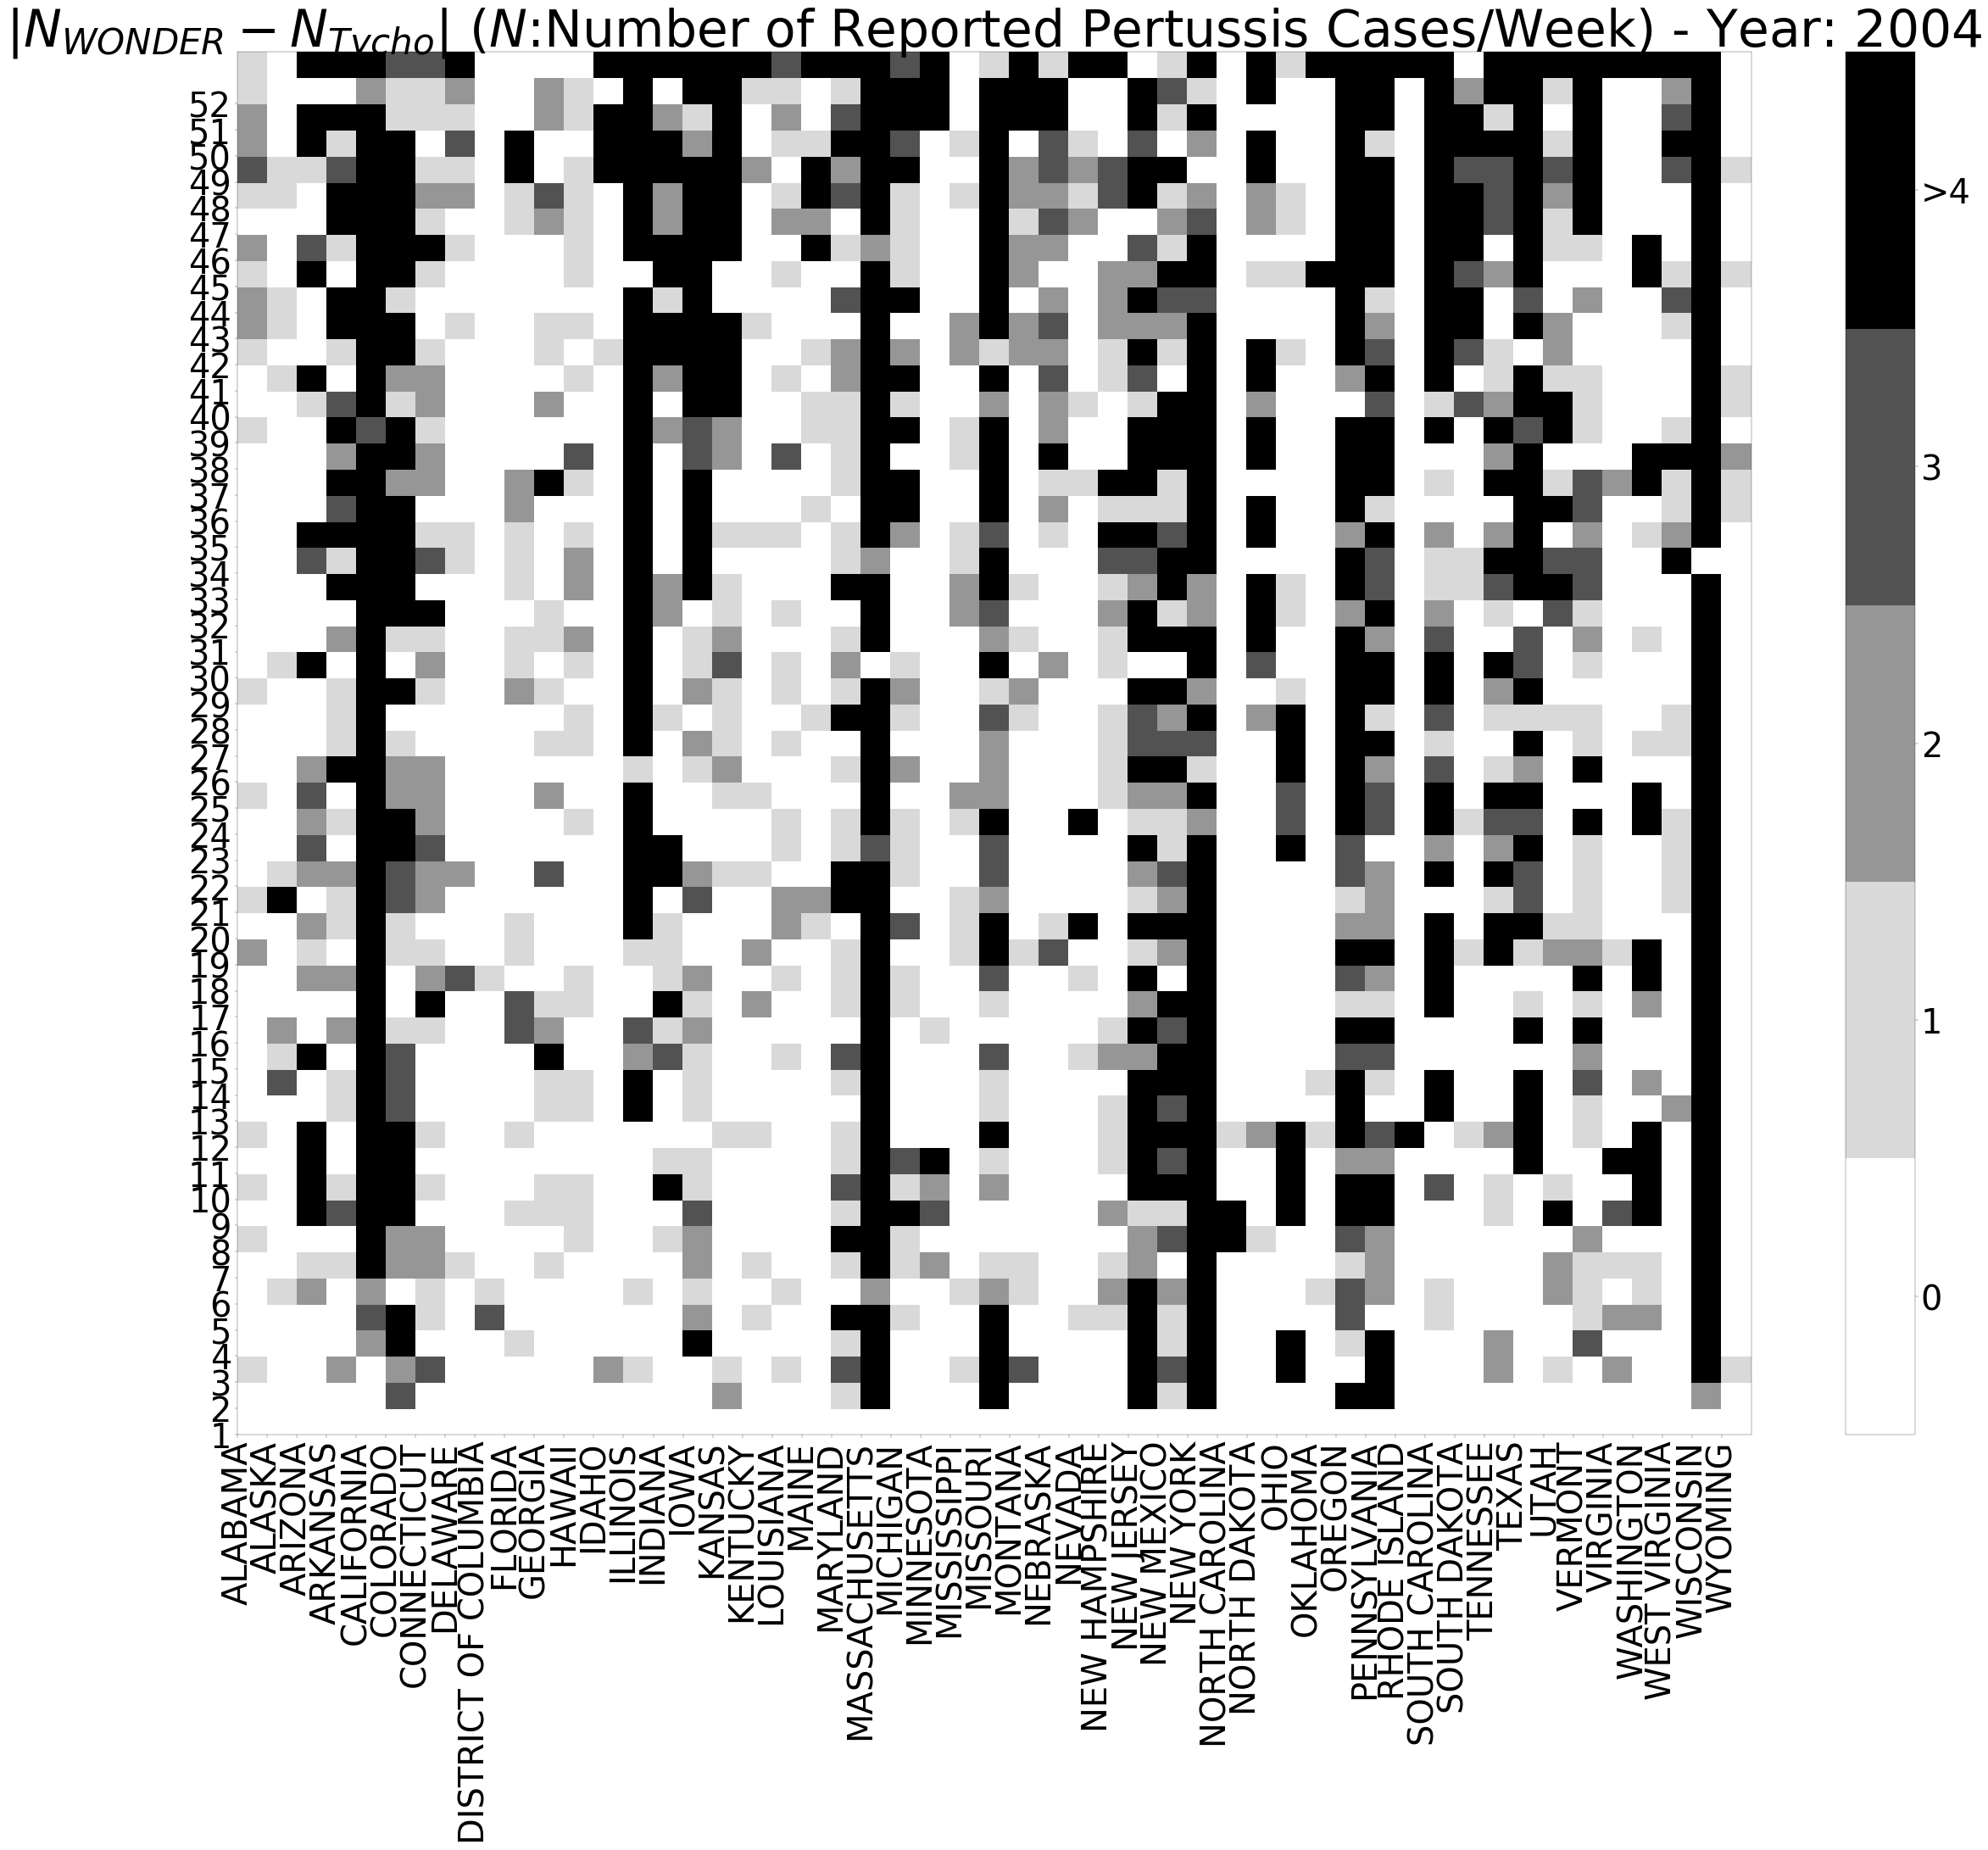

A Jupyter Widget

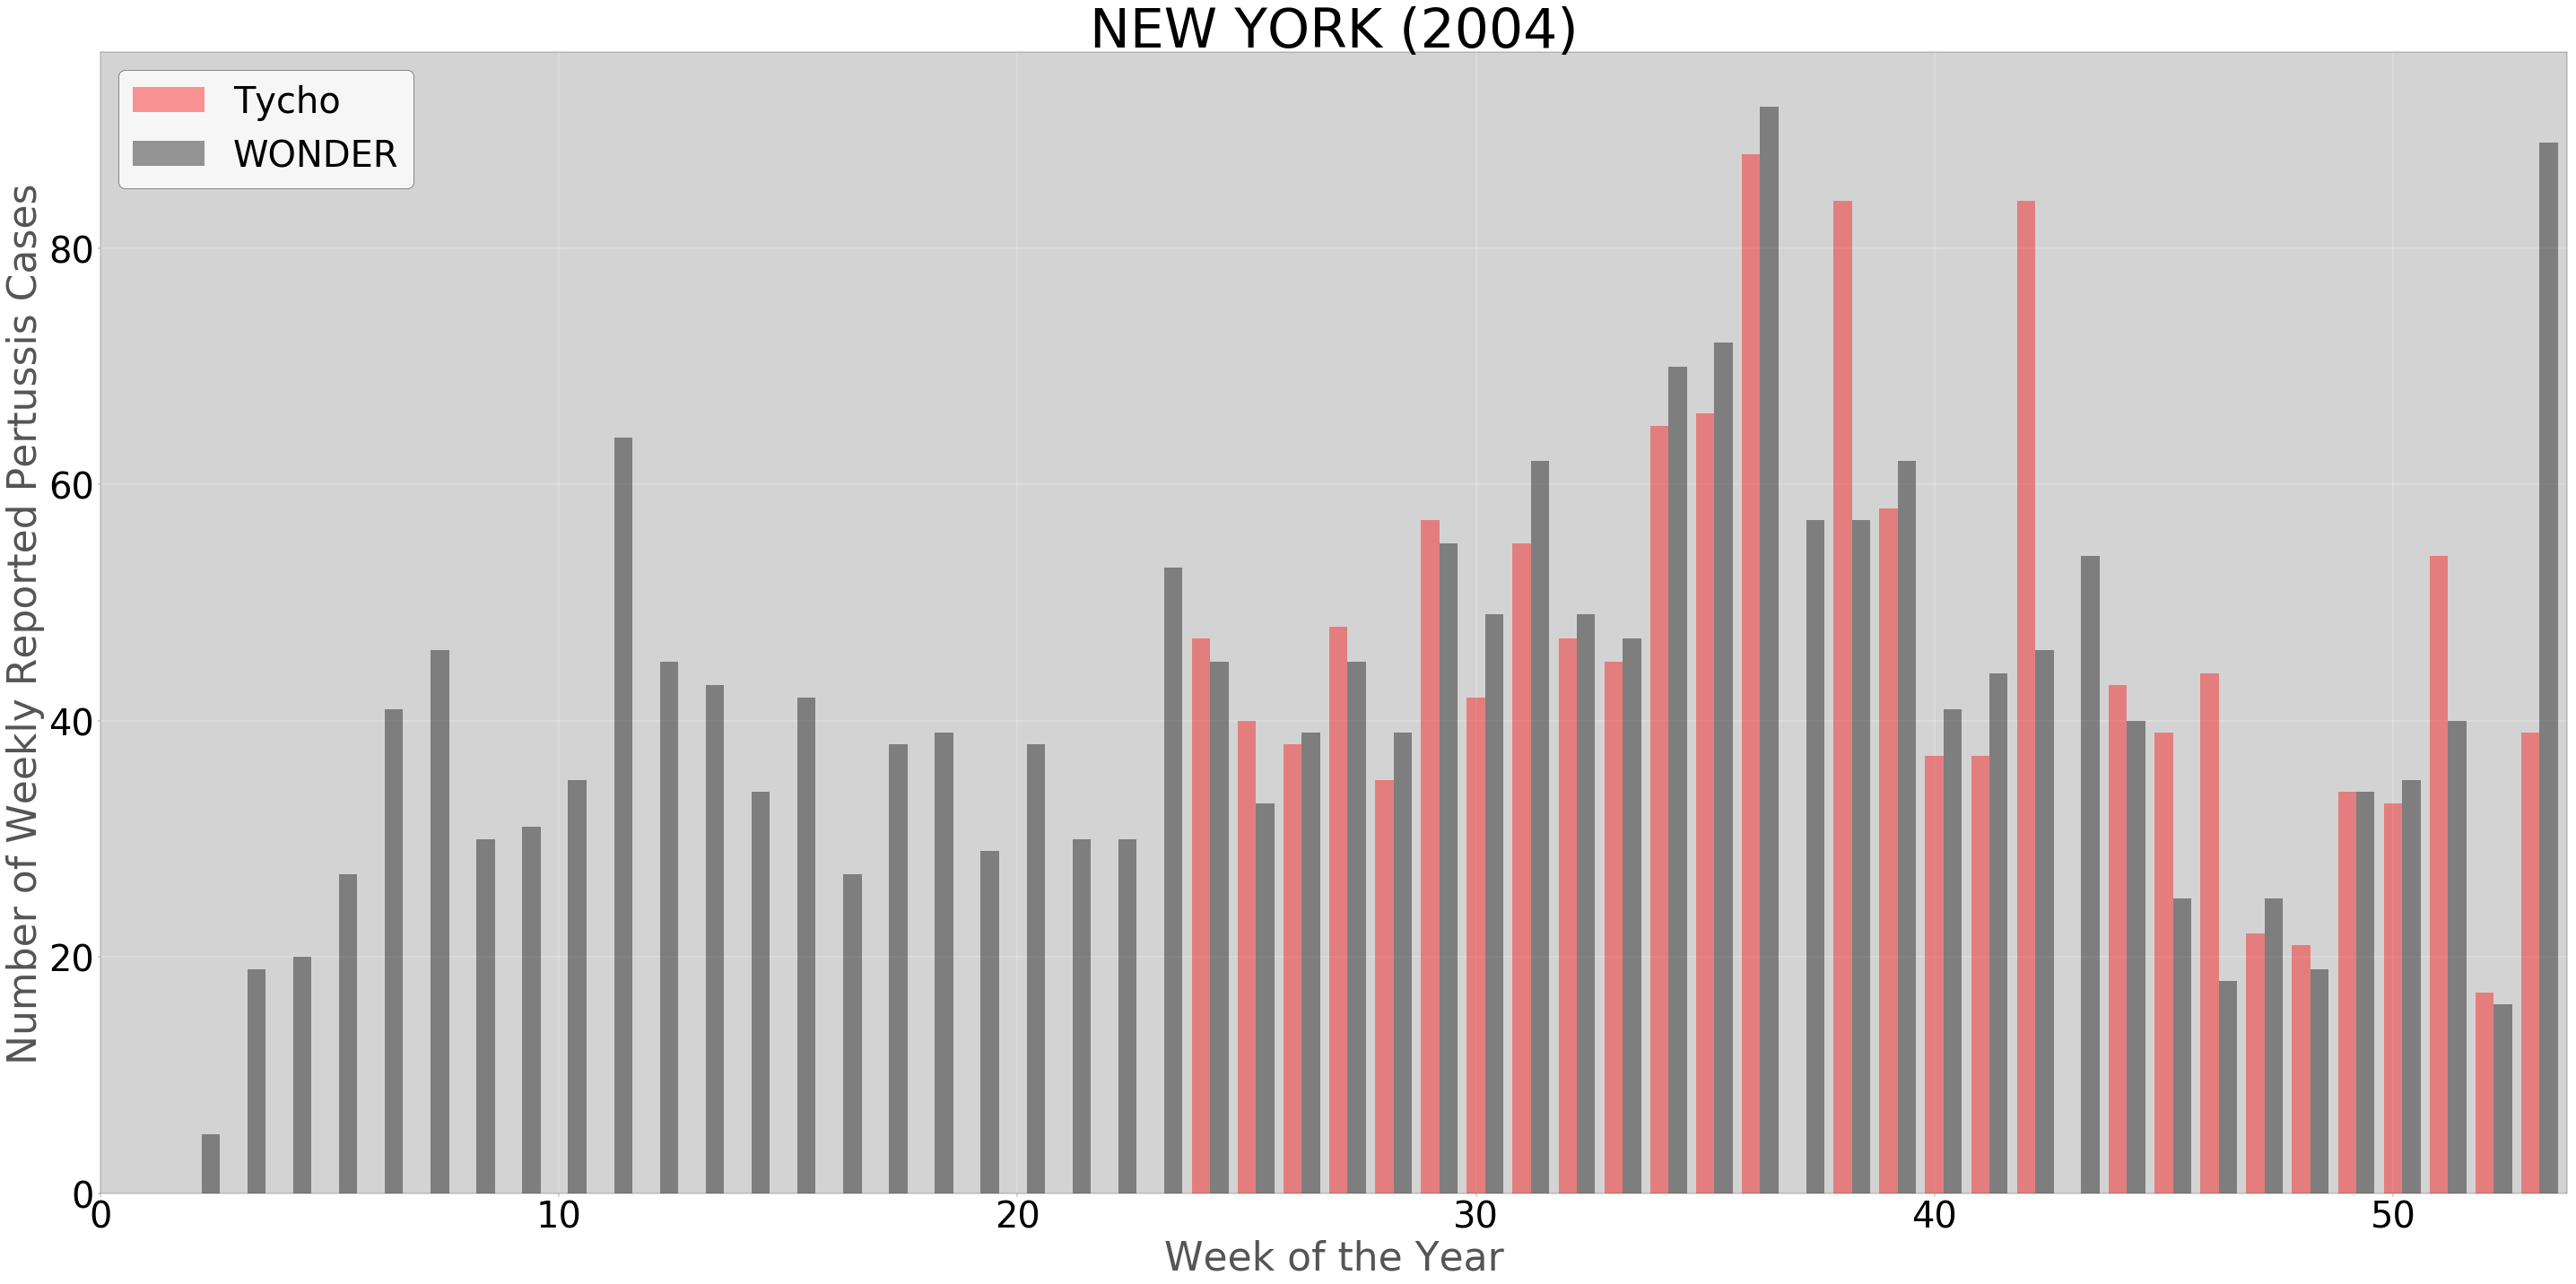

In [64]:
def HeatMapWeekly(Year):
    Tyc=Tycho_revised[str(Year)]   ## Weekly data from Tycho
    Tyc.fillna(value=0.0,inplace=True)
   
    
    CDC=MMWR_weekly[str(Year)]
    CDC.columns = CDC.columns.str.upper().str.replace('.', ' ')
    CDC.fillna(value=0.0,inplace=True)
    
    
    #diff=abs(-MMWR_weekly_YW)
    #I=diff[str(Year)]
    I=abs(Tyc-CDC)
    
    cmap = plt.get_cmap('Greys', 5)
    #cmap.set_under('gray')
    
   
    fig= plt.figure(figsize = (40, 30))
    ax = fig.add_subplot(1, 1, 1)
    
    heatmap=ax.pcolormesh(I,
                          cmap=cmap,
                          vmax=5.0
                          )
    plt.yticks(np.arange(0.01, 52, 1),
                         list(range(1,53)))
    plt.xticks(np.arange(0.01, len(I.columns), 1),
               I.columns,
               rotation='vertical')
    #fig.colorbar(ax, extend='min')
    cbar = fig.colorbar(heatmap,ticks=[0.5,1.5,2.5,3.5,4.5])
    cbar.ax.set_yticklabels(['0', '1', '2','3','>4'])
    #plt.title(r'Comparison of Pertussis Incidence Data (Jan. 1996 - July 2012): $(abs(I_{old}-I_{MMWR}))/(I_{old}+1)$')
    plt.title(r'$\vert N_{WONDER}-N_{Tycho} \vert$ ($N$:Number of Reported Pertussis Cases/Week) - Year: '+str(Year))
    plt.savefig('Wonder vs Tycho '+str(Year)+'.pdf',dpi=300,formapt='pdf',bbox_inches='tight')
    plt.show()
    #plt.close('fig')

def BarChartStates(state,Year):
       
        Tyc2=Tycho_revised[str(Year)]   ## Weekly data from Tycho
        Tyc2.fillna(value=0.0,inplace=True)
        x1=Tyc2[str(state)]
    
    
        #Pej=CDC_Pej
        CDC2=MMWR_weekly_YW[str(Year)]
        CDC2.columns = CDC2.columns.str.upper().str.replace('.', ' ')
        x2=CDC2[str(state)]
        
        #x1=MMWR_monthly.California['2005'].values
        #x2=CDC_Pej.California['2005'].values

        fig3= plt.figure(figsize = (40, 20))
        ax3 = fig3.add_subplot(1, 1, 1)
        index =np.arange(1,len(x1)+1,1)
        bar_width = 0.4

        opacity = 0.4
        #error_config = {'ecolor': '0.3'}





        rects2 = plt.bar(index,
                         x1, 
                         width=bar_width,
                         alpha=opacity,
                         color='r',
                         label='Tycho')
        rects2 = plt.bar(index + bar_width,
                         x2, 
                         width=bar_width,
                         alpha=opacity,
                         color='k',
                         label='WONDER')

#         for i in index:
#             ax3.text(i-0.1 , x1[i-1]+3 , str(x1[i-1]), color='r', fontsize=18,alpha=opacity,rotation=90)
#             ax3.text(i+bar_width-0.1 , x2[i-1]+3, str(x2[i-1]), color='k', fontsize=18,alpha=opacity,rotation=90)

        plt.xlabel('Week of the Year',fontsize=44)
        plt.ylabel('Number of Weekly Reported Pertussis Cases',fontsize=44)
        plt.title(str(state)+' ('+str(Year)+')')
        plt.xlim(0,53+2*bar_width)
        #plt.ylim(-0.001,1.01)
        #plt.xticks(index + bar_width / 2, ('A', 'B', 'C', 'D', 'E'))
        plt.legend()

        plt.tight_layout()
        plt.savefig(str(state)+str(Year)+'.pdf',dpi=300,format='pdf')
        plt.show()
   

# interactive_plot = interactive(HeatMap, Year=(1996,2010))
# output = interactive_plot.children[-1]
# output.layout.height = '850px'
# interactive_plot

w=widgets.Dropdown(
    options=['-']+list(range(1995,2012)),
    value='-',
    description='Year',    
    continuous_update=True,
)


w2=widgets.Dropdown(
    options=['-']+Tycho_states,
    value='-',
    description='State',
    continuous_update=True
)

def change_year(a):
    clear_output(wait=True)
    display(w)
    if isinstance(w.value,int):
        HeatMapWeekly(w.value)
    display(w2)
    w2.observe(change_state,names='value')
        
        
def change_state(b):
    clear_output(wait=True)
    display(w)
    if isinstance(w.value,int):
        HeatMapWeekly(w.value)
    display(w2)
    if w2.value!='-':
        BarChartStates(w2.value,w.value)
    
    
display(w)
w.observe(change_year,names='value')

In [16]:
# def HeatMapSub(Year,fig,subplot_number):
#     Tyc=Tycho[Tycho.YEAR==Year]   ## Weekly data from Tycho
#     Tyc.index=MMWRWeekRange(Year)
#     Tyc=Tyc.drop(['YEAR','WEEK'],axis=1)
#     Tyc.fillna(value=0.0,inplace=True)
    
    
#     #Pej=CDC_Pej
#     CDC=MMWR_weekly_YW_current[MMWR_weekly_YW_current.YEAR==Year]
#     CDC=CDC.drop(['YEAR','WEEK'],axis=1)
#     CDC.columns = CDC.columns.str.upper().str.replace('.', ' ')
#     CDC.fillna(value=0.0,inplace=True)
    
#     #diff=abs(-MMWR_weekly_YW)
#     #I=diff[str(Year)]
#     I=Tyc-CDC
    
#     cmap = plt.get_cmap('Greys', 5)
#     #cmap.set_under('gray')
    
   
#     #fig= plt.figure(figsize = (40, 20))
#     ax = fig.add_subplot(4, 3, subplot_number)
    
#     heatmap=ax.pcolormesh(I,
#                           cmap=cmap,
#                           vmin=-5.0,
#                           vmax=5.0
#                           )
#     plt.yticks(np.arange(0.01, 52, 1),
#                          list(range(1,53)))
#     plt.xticks(np.arange(0.01, len(I.columns), 1),
#                I.columns,
#                rotation='vertical')
#     #fig.colorbar(ax, extend='min')
#     #cbar = fig.colorbar(heatmap)
#     #cbar = fig.colorbar(heatmap,ticks=[0.5,1.5,2.5,3.5,4.5])
#     #cbar.ax.set_yticklabels(['0', '1', '2','3','>4'])
#     #plt.title(r'Comparison of Pertussis Incidence Data (Jan. 1996 - July 2012): $(abs(I_{old}-I_{MMWR}))/(I_{old}+1)$')
#     #plt.title(r'$N_{WONDER}-N_{Tycho}$ ($N$:Number of Reported Pertussis Cases/Week) - Year: '+str(Year))
#     #plt.savefig('Wonder vs Tycho '+str(Year),dpi=300,formapt='png',bbox_inches='tight')
#     #plt.show()

# Years=list(range(1996,2002))+list(range(2006,2013))
# Years.remove(1997)
# Years.remove(2008)
# Years.remove(2011)

# fig_current= plt.figure(figsize = (40, 20))
# counter=1
# for Year in Years:
#     HeatMapSub(Year,fig_current,counter)
#     counter=counter+1
# plt.show()
    


### Heatmap: Tycho vs. WONDER _Current Week_ data

C:\Users\arashs\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


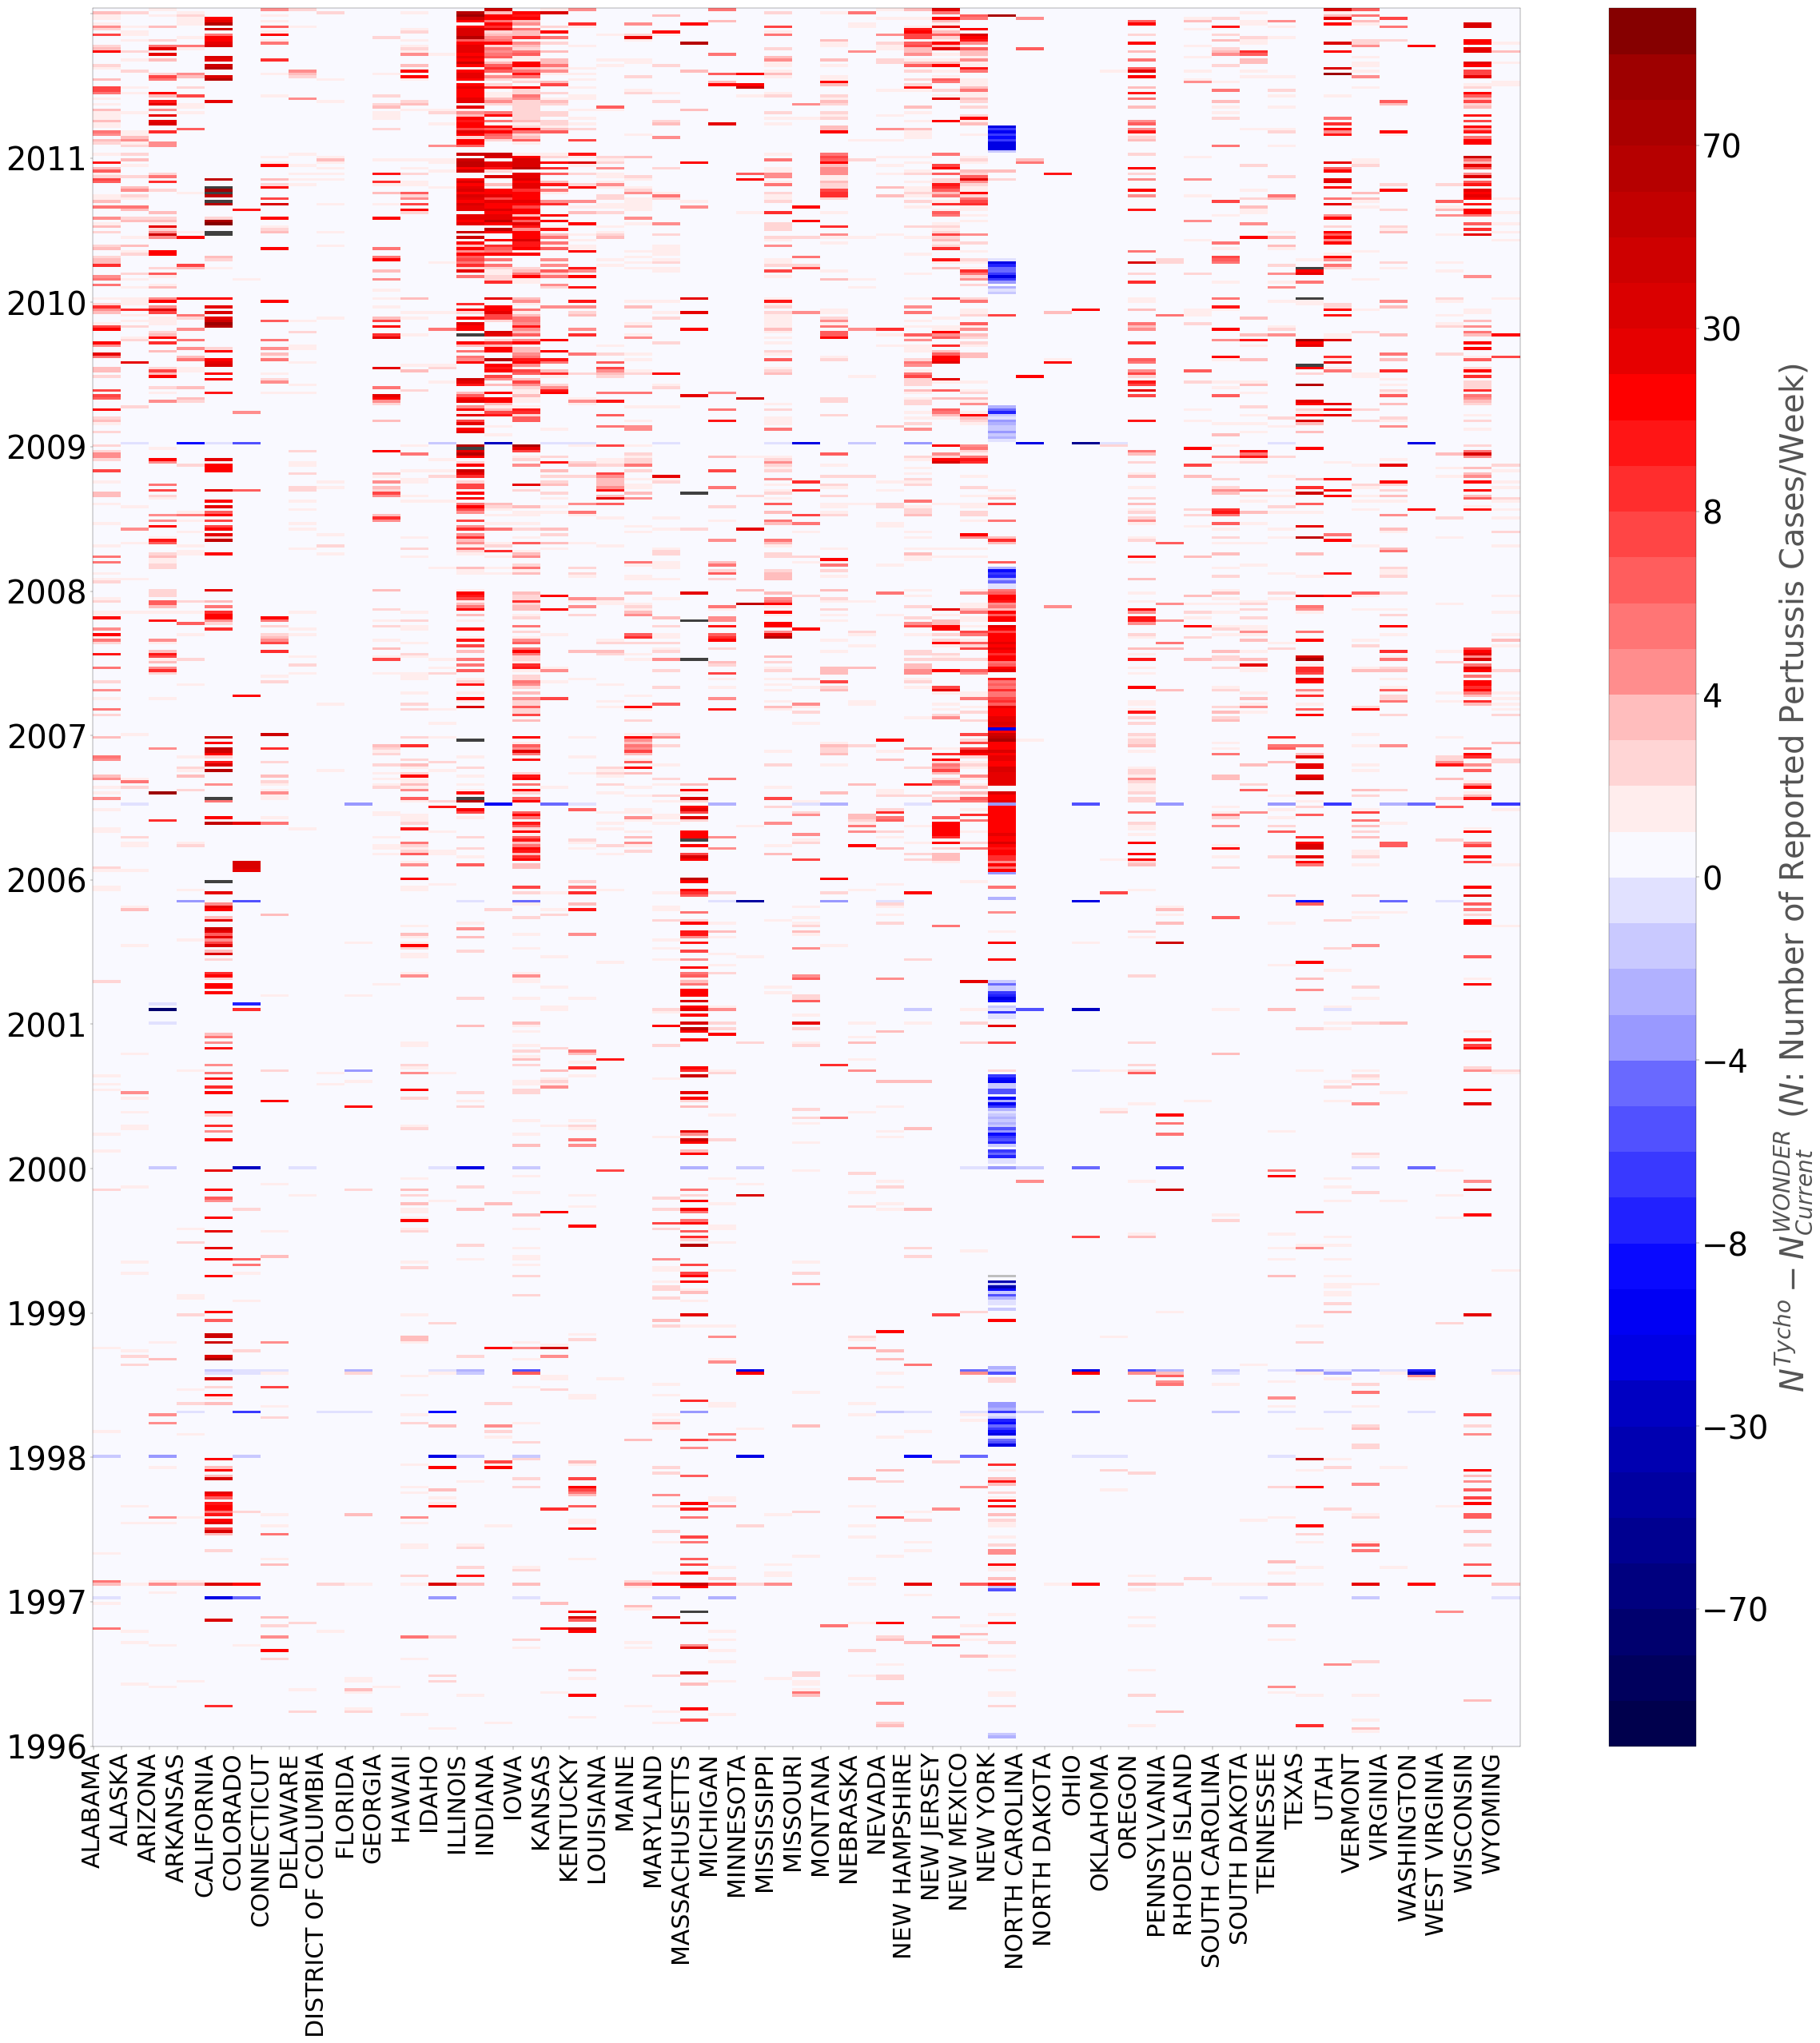

In [61]:
CDC2=MMWR_weekly_current.truncate(after='2011-12-31')
CDC2.columns = CDC2.columns.str.upper().str.replace('.', ' ')
CDC2.fillna(value=0.0,inplace=True)

Tyc2=Tycho_revised[Tycho_revised.index.isin(CDC2.index)]
Tyc2.fillna(value=0.0,inplace=True)


I=Tyc2-CDC2

Years_current_reported=CDC2.index.year.unique()

# # define the colormap
cmap = plt.cm.seismic
# # extract all colors from the .seismic map
cmaplist = [cmap(i) for i in range(0,256,6)]

bounds1=np.arange(1,11,1)
bounds2=np.arange(20,110,10)
bounds=np.append(bounds1,bounds2)
bounds=np.append(-bounds,bounds)
bounds=np.append(bounds,[0])
bounds=np.sort(bounds)

cmap = mpl.colors.ListedColormap(cmaplist)
cmap.set_over('0.25')
cmap.set_under('0.75')

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


fig2= plt.figure(figsize = (40, 40))
ax = fig2.add_subplot(1, 1, 1)

heatmap=ax.pcolormesh(I,
                      cmap=cmap,
                      norm=norm
#                      vmin=-10.0,
#                      vmax=10.0
                      )
plt.yticks(np.arange(0.01, len(Tyc2), 52),
                    Years_current_reported)
plt.xticks(np.arange(0.01, len(I.columns), 1),
           I.columns,
           rotation='vertical'
           ,fontsize=30)

cbar = fig2.colorbar(heatmap,label='$N^{Tycho}-N_{Current}^{WONDER}$ ($N$: Number of Reported Pertussis Cases/Week)')

#fig2.text(x=0.3,y=0,s=r'$N_{WONDER:Current \ \ Week}-N_{Tycho}$ ($N$:Number of Reported Pertussis Cases/Week)',fontsize=28)
#fig2.text(x=0.12,y=-0.02,s=r'-$N_{WONDER:Current \ \ Week}$: Number of reported Pertussis cases from the current week column from CDC WONDER MMWR tables',fontsize=22)
plt.savefig('Wonder Current Week vs Tycho.pdf',dpi=300,format='pdf',bbox_inches='tight')
plt.show()

C:\Users\arashs\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


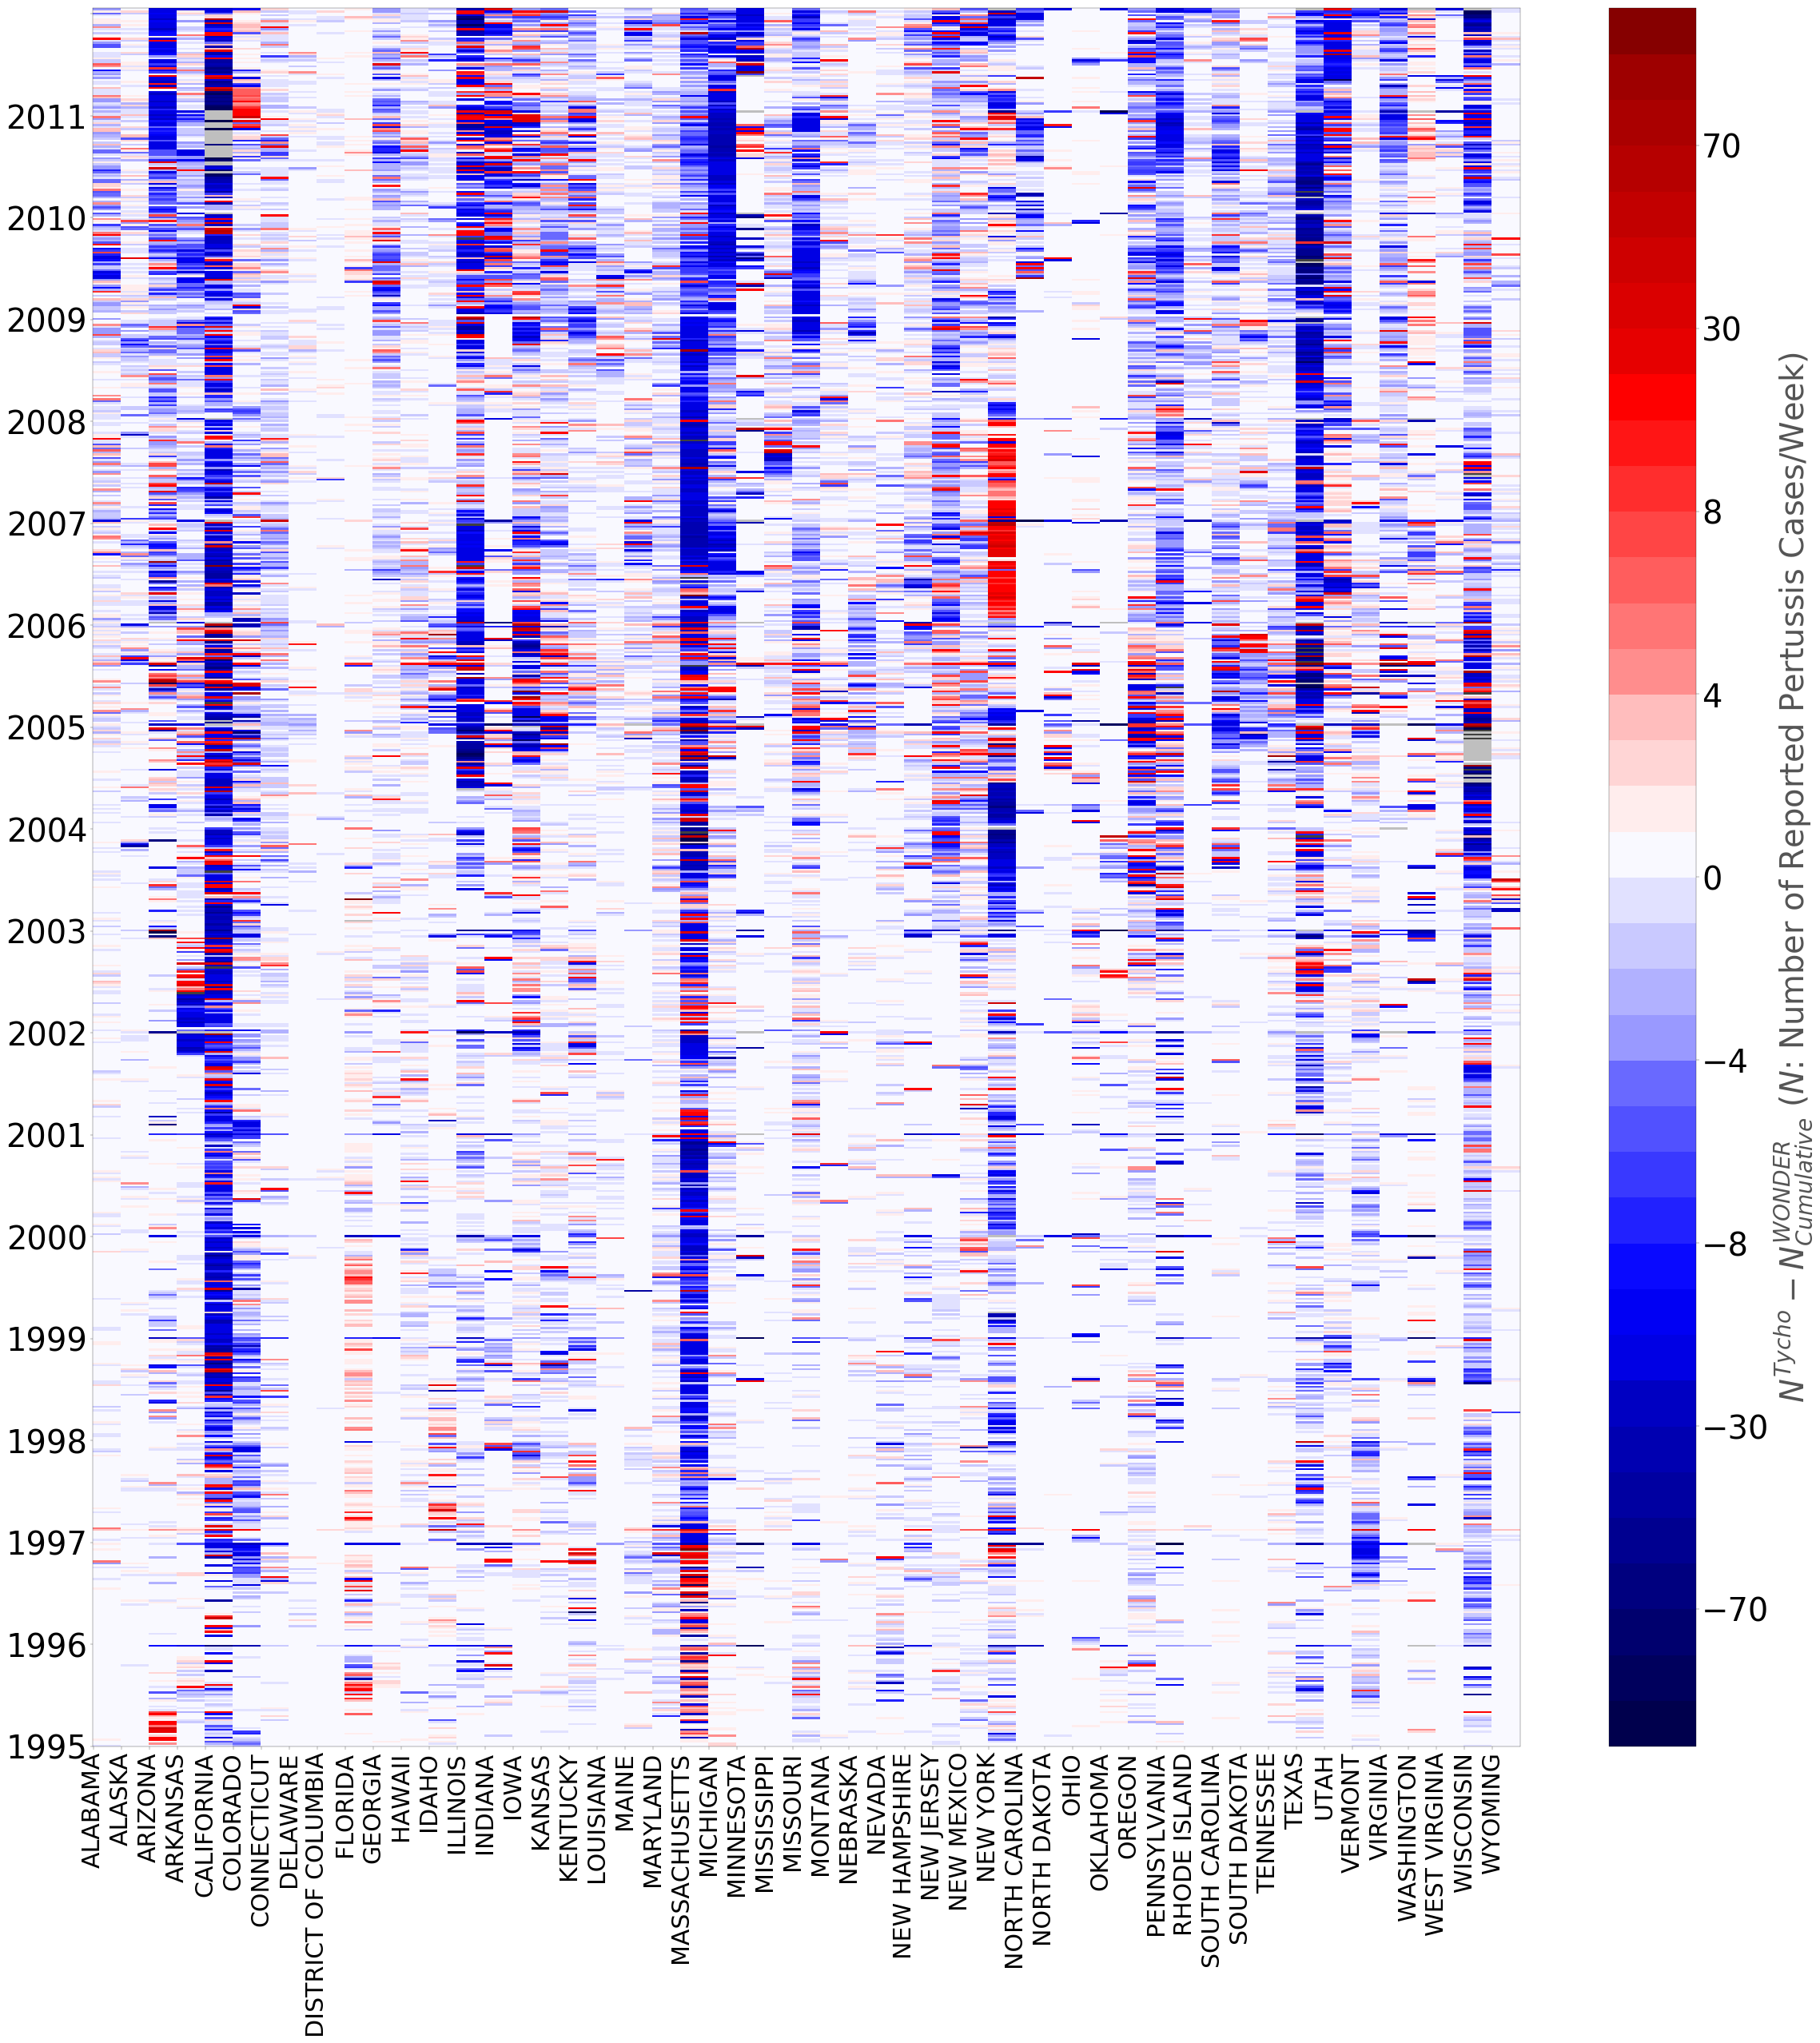

In [62]:
CDC3=MMWR_weekly.truncate(after='2011-12-31')
CDC3.columns = CDC3.columns.str.upper().str.replace('.', ' ')
CDC3.fillna(value=0.0,inplace=True)

Tyc3=Tycho_revised[Tycho_revised.index.isin(CDC3.index)]
Tyc3.fillna(value=0.0,inplace=True)


I=Tyc3-CDC3

Years_current_reported=CDC3.index.year.unique()

# # define the colormap
cmap = plt.cm.seismic
# # extract all colors from the .seismic map
cmaplist = [cmap(i) for i in range(0,256,6)]

bounds1=np.arange(1,11,1)
bounds2=np.arange(20,110,10)
bounds=np.append(bounds1,bounds2)
bounds=np.append(-bounds,bounds)
bounds=np.append(bounds,[0])
bounds=np.sort(bounds)

cmap = mpl.colors.ListedColormap(cmaplist)
cmap.set_over('0.25')
cmap.set_under('0.75')

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


fig3= plt.figure(figsize = (40, 40))
ax3 = fig3.add_subplot(1, 1, 1)

heatmap=ax3.pcolormesh(I,
                      cmap=cmap,
                      norm=norm
#                      vmin=-10.0,
#                      vmax=10.0
                      )
plt.yticks(np.arange(0.01, len(Tyc3), 52),
                    Years_current_reported)
plt.xticks(np.arange(0.01, len(I.columns), 1),
           I.columns,
           rotation='vertical'
          ,fontsize=30)

cbar = fig3.colorbar(heatmap,label='$N^{Tycho}-N_{Cumulative}^{WONDER}$ ($N$: Number of Reported Pertussis Cases/Week)')

#fig3.text(x=0.3,y=0,s=r'$N_{WONDER:Cum.}-N_{Tycho}$ ($N$:Number of Reported Pertussis Cases/Week)',fontsize=28)
#fig3.text(x=0.12,y=-0.02,s=r'-$N_{WONDER:Cum. \ \ Week}$: Number of reported Pertussis cases from the next year cumulative column from CDC WONDER MMWR tables',fontsize=22)
plt.savefig('Wonder cumulative next year vs Tycho.pdf',dpi=300,format='pdf',bbox_inches='tight')
plt.show()

C:\Users\arashs\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


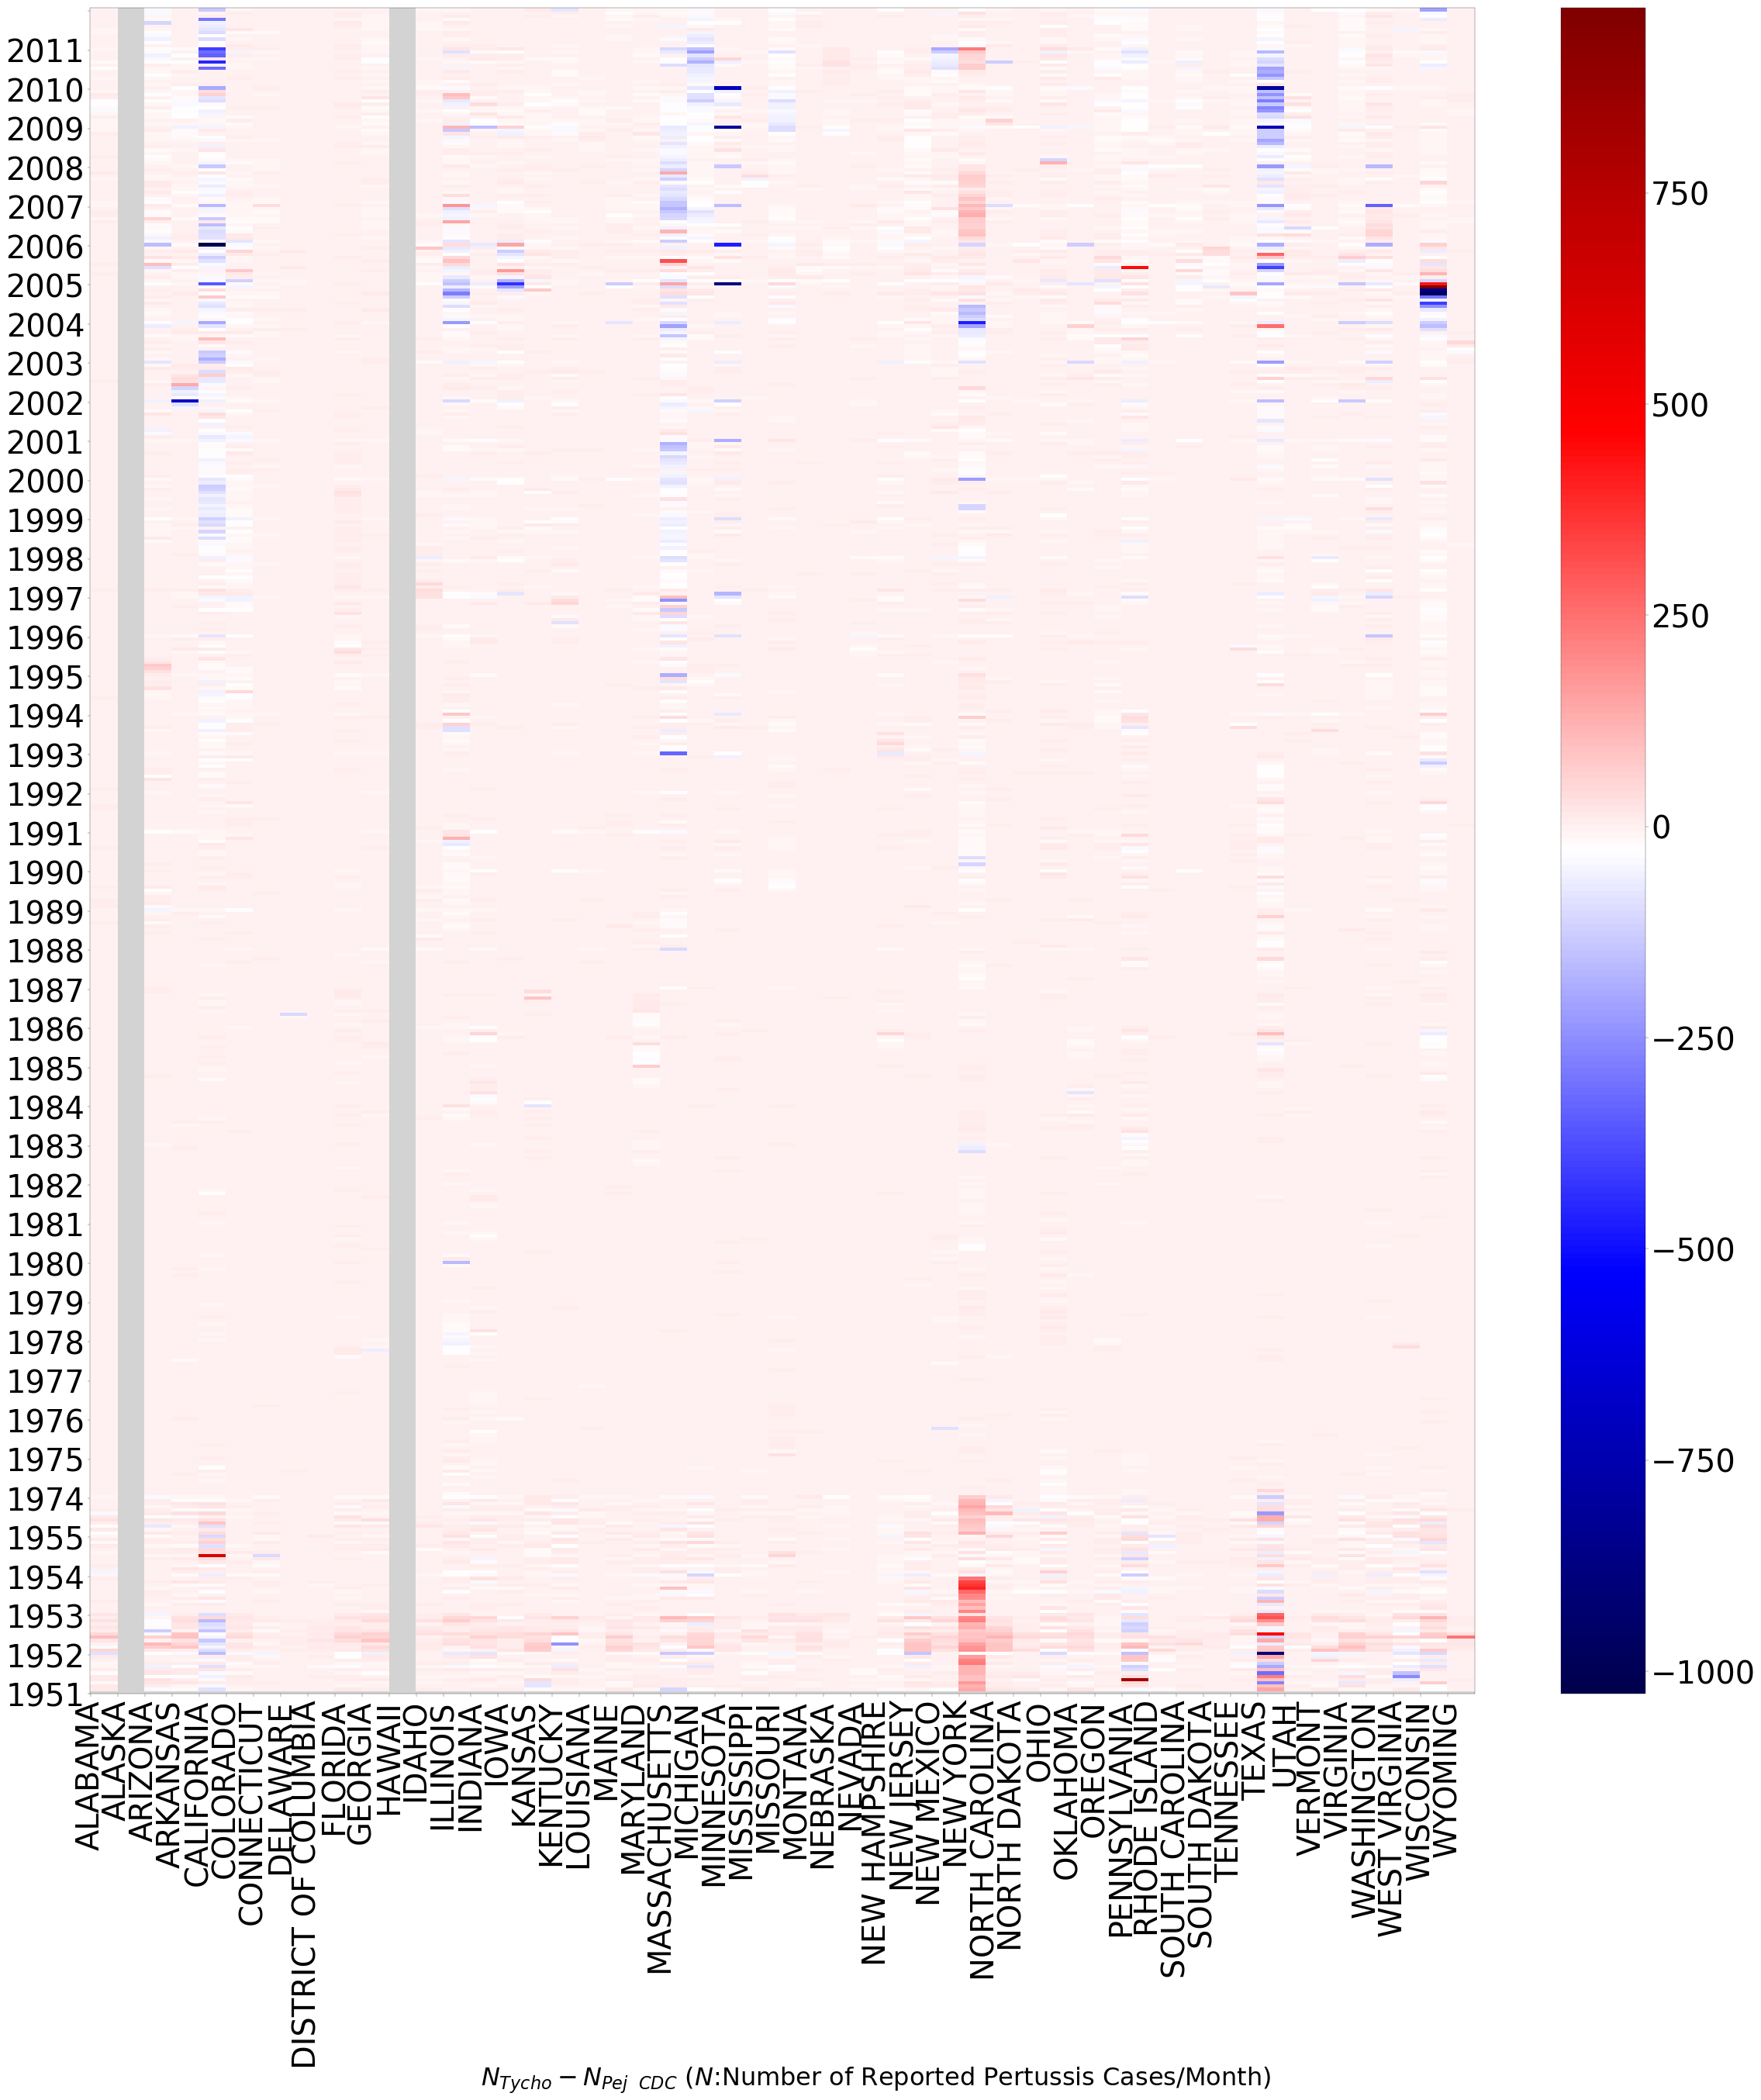

In [19]:
Pejs=CDC_Pej[CDC_Pej.index.isin(Tycho_monthly.index)]

Pejs.columns = Pejs.columns.str.upper().str.replace('.', ' ')
Pejs.fillna(value=0.0,inplace=True)

Tyc4=Tycho_monthly
Tyc4.fillna(value=0.0,inplace=True)


I=Tyc4-Pejs

Years_current_reported=Pejs.index.year.unique()

# # define the colormap
# cmap = plt.cm.seismic
# # # extract all colors from the .seismic map
# cmaplist = [cmap(i) for i in range(0,256,6)]

# bounds1=np.arange(1,11,1)
# bounds2=np.arange(20,110,10)
# bounds=np.append(bounds1,bounds2)
# bounds=np.append(-bounds,bounds)
# bounds=np.append(bounds,[0])
# bounds=np.sort(bounds)

# cmap = mpl.colors.ListedColormap(cmaplist)
# cmap.set_over('0.25')
# cmap.set_under('0.75')

# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


fig4= plt.figure(figsize = (40, 40))
ax4 = fig4.add_subplot(1, 1, 1)

heatmap=ax4.pcolormesh(I,
                      cmap='seismic'
#                      ,norm=norm
#                      vmin=-10.0,
#                      vmax=10.0
                      )
plt.yticks(np.arange(0.01, len(Tyc4), 12),
                    Years_current_reported)
plt.xticks(np.arange(0.01, len(I.columns), 1),
           I.columns,
           rotation='vertical')

cbar = fig4.colorbar(heatmap)

fig4.text(x=0.3,y=-0.05,s=r'$N_{Tycho}-N_{Pej \ \ CDC}$ ($N$:Number of Reported Pertussis Cases/Month)',fontsize=32)
#fig4.text(x=0.12,y=-0.02,s=r'-$N_{WONDER:Cum. \ \ Week}$: Number of reported Pertussis cases from the next year cumulative column from CDC WONDER MMWR tables',fontsize=22)
plt.savefig('Pej vs Tycho.pdf',dpi=300,format='pdf',bbox_inches='tight')
plt.show()

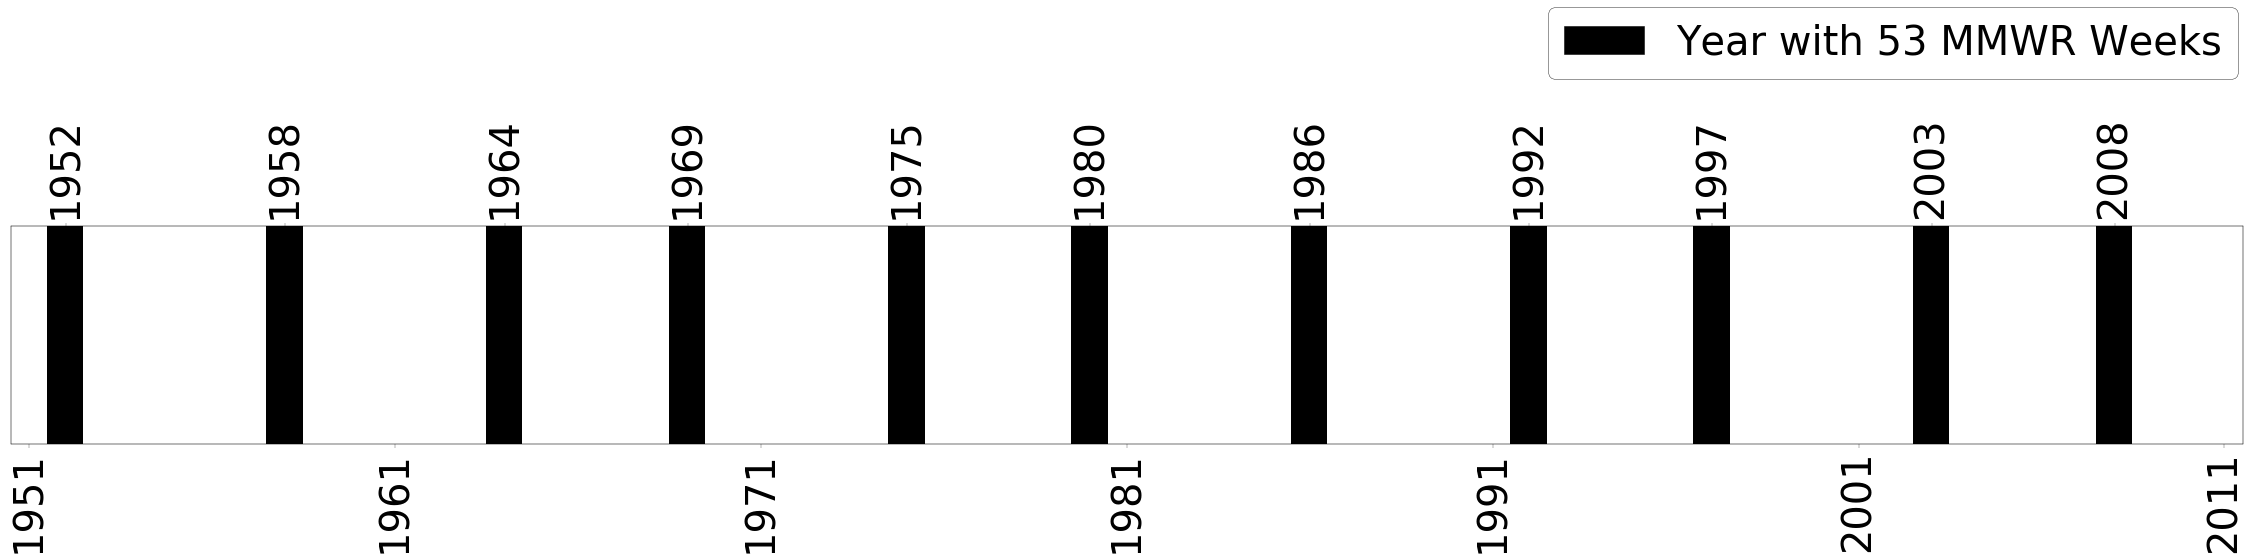

In [63]:
import seaborn as sns
n_weeks=np.zeros((2011-1951+1,2))
n_weeks[0,:]=[1951,len(MMWRWeekRange(1951))]  #### Number of weeks in each year per CDC definition
for i in range(1952,2012):
    n_weeks[i-1951,:]=[i,len(MMWRWeekRange(i))]
d = {'53 Weeks': n_weeks[:,1]-52}    
weeks_matrix=pd.DataFrame(data=d,index=n_weeks[:,0],dtype='int32')
weeks_matrix=weeks_matrix.T
weeks_matrix.columns = weeks_matrix.columns.astype(int)
fig4= plt.figure(figsize = (40, 4))
ax4 = fig4.add_subplot(1, 1, 1)






weeks_plot=plt.pcolormesh(weeks_matrix,cmap='binary')


plt.xticks(
          np.arange(0.5, len(weeks_matrix.columns), 10)
         ,range(1951,2012,10)
         ,rotation='vertical'
         ,fontsize=40
          )

plt.yticks([])


w53=weeks_matrix[weeks_matrix==1]
w53=w53.dropna(axis=1, how='all')

ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(w53.columns-1951+0.5)
ax5.set_xticklabels(w53.columns,rotation='vertical')
#ax5.set_xlabel(r"Modified x-axis: $1/(1+X)$")

ax5.grid(b=False)

black_patch = mpatches.Patch(color='black', label='Year with 53 MMWR Weeks')
plt.legend(handles=[black_patch],bbox_to_anchor=(0.68, 2.1),loc=2)

plt.savefig('number of weeks.pdf',dpi=300,formapt='pdf',bbox_inches='tight')
plt.show()



In [21]:
# fig2= plt.figure(figsize = (20, 10))
# ax2 = fig2.add_subplot(1, 1, 1)
# x1=MMWR_monthly.Massachusetts['2000'].values
# x2=CDC_Pej.Massachusetts['2000'].values


# index =np.arange(1,len(x1)+1,1)
# bar_width = 0.25

# opacity = 0.4
# #error_config = {'ecolor': '0.3'}


# rects2 = plt.bar(index,
#                  x1, 
#                  width=bar_width,
#                  alpha=opacity,
#                  color='r',
#                  label='Scraping CDC WONDER')
# rects2 = plt.bar(index + bar_width,
#                  x2, 
#                  width=bar_width,
#                  alpha=opacity,
#                  color='k',
#                  label="Pej's")

# for i in index:
#     ax2.text(i-0.1 , x1[i-1]+25 , str(x1[i-1]), color='r', fontsize=22,alpha=opacity,rotation=90)
#     ax2.text(i+bar_width-0.1 , x2[i-1]+25, str(x2[i-1]), color='k', fontsize=22,alpha=opacity,rotation=90)

# plt.xlabel('Month')
# plt.ylabel('Monthly Pertussis Incidence')
# plt.title('Massachusetts (2005)')
# #plt.xticks(index + bar_width / 2, ('A', 'B', 'C', 'D', 'E'))
# plt.legend()

# plt.tight_layout()
# #plt.show()
# # plt.savefig('Mass 2005',dpi=300,formapt='png')

In [22]:
# fig3= plt.figure(figsize = (20, 10))
# ax3 = fig3.add_subplot(1, 1, 1)
# x1=MMWR_monthly.California['2005'].values
# x2=CDC_Pej.California['2005'].values


# index =np.arange(1,len(x1)+1,1)
# bar_width = 0.25

# opacity = 0.4
# #error_config = {'ecolor': '0.3'}





# rects2 = plt.bar(index,
#                  x1, 
#                  width=bar_width,
#                  alpha=opacity,
#                  color='r',
#                  label='Scraping')
# rects2 = plt.bar(index + bar_width,
#                  x2, 
#                  width=bar_width,
#                  alpha=opacity,
#                  color='k',
#                  label='Pej')

# for i in index:
#     ax3.text(i-0.1 , x1[i-1]+15 , str(x1[i-1]), color='r', fontsize=22,alpha=opacity,rotation=90)
#     ax3.text(i+bar_width-0.1 , x2[i-1]+15, str(x2[i-1]), color='k', fontsize=22,alpha=opacity,rotation=90)

# plt.xlabel('Month')
# plt.ylabel('Monthly Pertussis Incidence')
# plt.title('California (2005)')
# #plt.xticks(index + bar_width / 2, ('A', 'B', 'C', 'D', 'E'))
# plt.legend()

# plt.tight_layout()
# plt.savefig('Cali 2005',dpi=300,formapt='png')
# plt.show()

In [23]:
# # Tycho_file_name='Tycho_PERTUSSIS_Cases_1951-2012.csv'
# # Tycho=pd.read_csv(Tycho_file_name,header=0,index_col=None,skiprows=2)
# # idx=MMWRWeekRange(1951)
# n_weeks=np.zeros((2011-1951+1,2))
# n_weeks[0,:]=[1951,len(MMWRWeekRange(1951))]  #### Number of weeks in each year per CDC definition
# for i in range(1952,2012):
#     n_weeks[i-1951,:]=[i,len(MMWRWeekRange(i))]
#     #idx2=MMWRWeekRange(i)
#     #idx=idx.union(idx2)
    
 
# #Tycho.index=idx
# #Tycho.drop(['YEAR','WEEK'],axis=1,inplace=True)
# #Tycho=Tycho[Tycho.YEAR==1996]
# n_weeks_Tycho=np.zeros((2011-1951+1,2))   #### Number of weeks in each year from Tycho project 
# for i in range(1951,2012):
#          Temp=Tycho[Tycho.YEAR==i]
#          Temp.reset_index(drop=True)
#          n_weeks_Tycho[i-1951,:]=[i,Temp.shape[0]]

        


# comapre_weeks={'N weeks in year per CDC':n_weeks[:,1],'N weeks from Tycho':n_weeks_Tycho[:,1]} 
# comapre_weeks=pd.DataFrame(comapre_weeks,index=n_weeks[:,0])
# comapre_weeks.index.name='Year'


# x1=n_weeks[:,1]
# x2=n_weeks_Tycho[:,1]
        
# #x1=MMWR_monthly.California['2005'].values
# #x2=CDC_Pej.California['2005'].values

# fig4= plt.figure(figsize = (20, 10))
# ax4 = fig4.add_subplot(1, 1, 1)
# index =np.arange(1,len(x1)+1,1)
# bar_width = 0.4

# opacity = 0.4
# #error_config = {'ecolor': '0.3'}





# rects2 = plt.bar(index,
#                  x1, 
#                  width=bar_width,
#                  alpha=opacity,
#                  color='r',
#                  label='CDC')
# rects2 = plt.bar(index + bar_width,
#                  x2, 
#                  width=bar_width,
#                  alpha=opacity,
#                  color='k',
#                  label='Tycho')

# #         for i in index:
# #             ax3.text(i-0.1 , x1[i-1]+3 , str(x1[i-1]), color='r', fontsize=18,alpha=opacity,rotation=90)
# #             ax3.text(i+bar_width-0.1 , x2[i-1]+3, str(x2[i-1]), color='k', fontsize=18,alpha=opacity,rotation=90)

# plt.xlabel('Year')
# plt.ylabel('Number of Weeks in Each Year According to CDC Definition')
# #plt.title('Number of Reported Pertussis Cases- '+str(state)+' ('+str(Year)+')')
# #plt.xlim(-1,53)
# #plt.ylim(-0.001,1.01)
# #plt.xticks(index + bar_width / 2, ('A', 'B', 'C', 'D', 'E'))
# plt.legend()

# plt.tight_layout()
# #plt.savefig(str(state)+str(Year),dpi=300,formapt='png')
# plt.show()



In [24]:
# Tycho_revised=Tycho_revised[~Tycho_revised.index.year.isin(range(1956,1974))]
# Tycho_revised.index.year.unique()
# Tycho_temp.index.year.unique()

Tycho_temp2=Tycho_revised/7
Tycho_daily2=Tycho_temp2.resample('D').pad()
Tycho_daily2['1958']
#Tycho_monthly2=Tycho_daily2.resample('M').sum()
#Tycho_monthly2=Tycho_monthly2.round()
#Tycho_temp.index.year.unique()


,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
dir(ax5)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_legend_handles',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mo

In [26]:
dir(ax.xaxis)

['OFFSETTEXTPAD',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alpha',
 '_animated',
 '_autolabelpos',
 '_axes',
 '_clipon',
 '_clippath',
 '_contains',
 '_copy_tick_props',
 '_get_label',
 '_get_offset_text',
 '_get_pixel_distance_along_axis',
 '_get_tick',
 '_get_tick_bboxes',
 '_gid',
 '_gridOnMajor',
 '_gridOnMinor',
 '_label',
 '_lastNumMajorTicks',
 '_lastNumMinorTicks',
 '_major_tick_kw',
 '_minor_tick_kw',
 '_mouseover',
 '_oid',
 '_path_effects',
 '_picker',
 '_prop_order',
 '_propobservers',
 '_rasterized',
 '_remove_method',
 '_scale',
 '_set_artist_props',
 '_set_gc_clip',
 '_set_scale',
 '_sketch',
 '_smar